#Load Data

In [ ]:
# 1. Load the data and save it to a pandas dataframe
# 2. EDA
# 3. Preprocessing: Deal with missing values (replace or drop)
# 4. Preprocessing: Deal with non-number value - encode to categorical (numeric) data
# 5. Feature selection: define X, Y (using correlation matrix) - not all features can be processed
# 6. Split the data to 70:30
# 7. Train the data using NB (try CategoricalNB and GaussianNB)
# 8. Evaluate the model
# 9. Improve the model: Data resampling (OPT)
# 10. Improve the model: Hyperparameter tuning (OPT)


In [1]:
import pandas as pd
import seaborn as sb

In [2]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/refs/heads/master/titanic_train.csv

--2025-03-13 03:45:02--  https://raw.githubusercontent.com/andrychowanda/COMP6577/refs/heads/master/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72499 (71K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  70.80K  --.-KB/s    in 0.03s   

2025-03-13 03:45:03 (2.59 MB/s) - ‘titanic_train.csv’ saved [72499/72499]



In [3]:
data = pd.read_csv('titanic_train.csv')

#EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [5]:
print(data["survived"].value_counts())

survived
0    537
1    313
Name: count, dtype: int64


<Axes: >

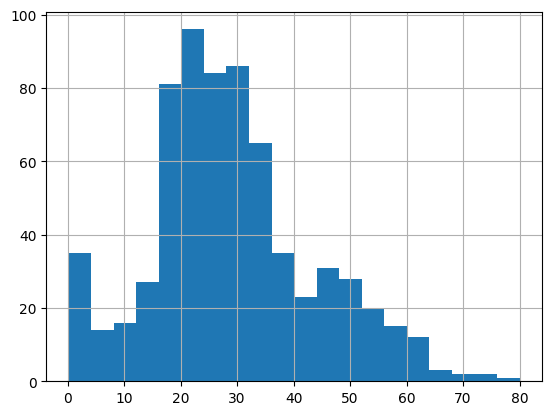

In [6]:
data["age"].hist(bins=20)

<Axes: >

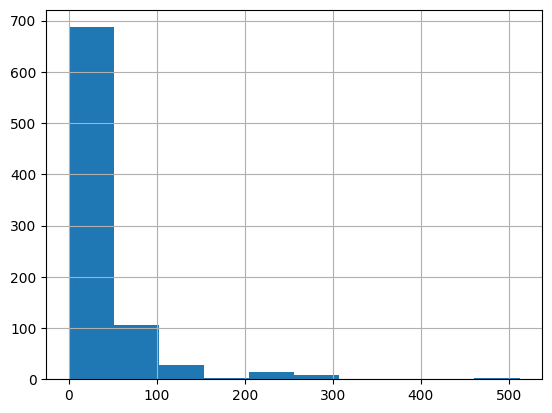

In [7]:
data["fare"].hist(bins=10)

In [8]:
data["pclass"].value_counts()

,count
pclass,
3,478
1,206
2,166


<ipython-input-9-f517af1f314c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["sex"], palette="viridis")


<Axes: xlabel='count', ylabel='sex'>

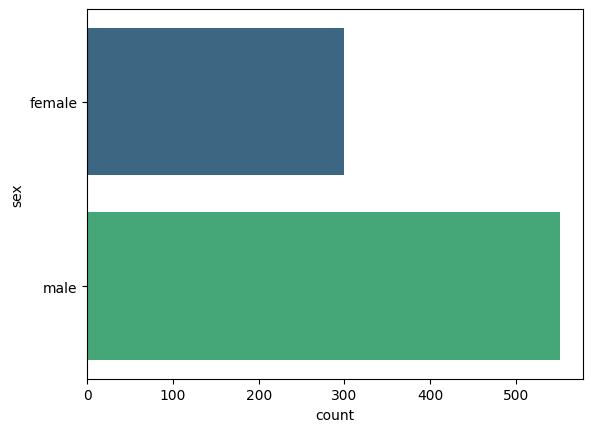

In [9]:
sb.countplot(data["sex"], palette="viridis")

<ipython-input-10-1bc0791dbd55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["embarked"], palette="viridis")


<Axes: xlabel='count', ylabel='embarked'>

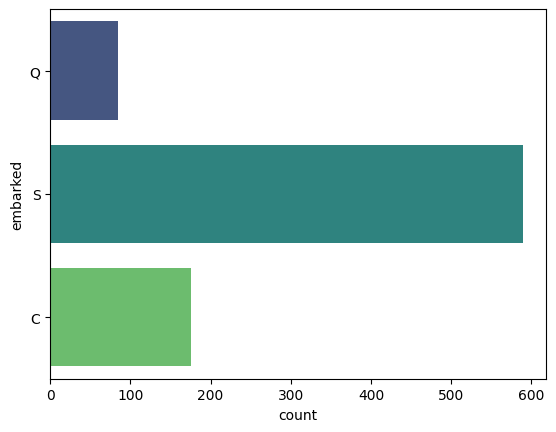

In [10]:
sb.countplot(data["embarked"], palette="viridis")

<Axes: xlabel='sex', ylabel='survived'>

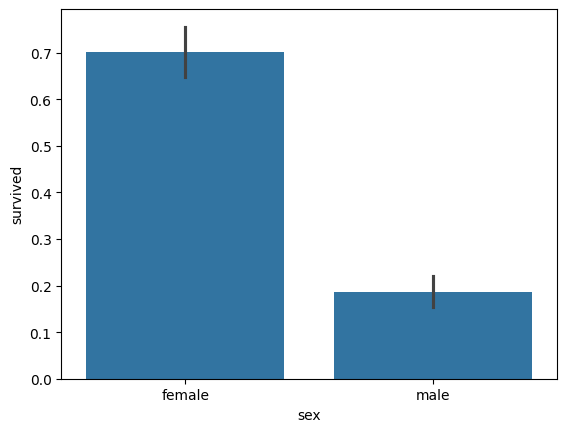

In [11]:
sb.barplot(x="sex", y="survived", data=data)

<Axes: xlabel='pclass', ylabel='survived'>

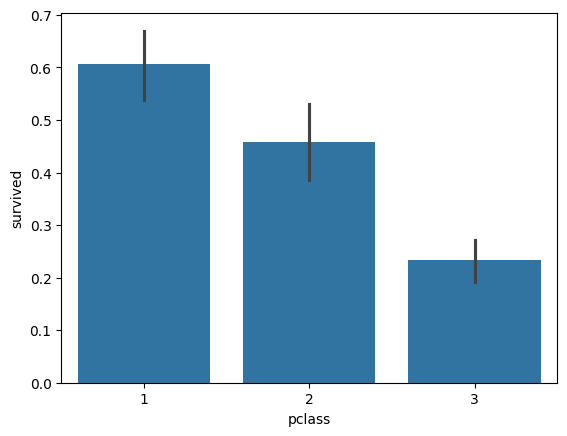

In [12]:
sb.barplot(x="pclass", y="survived", data=data)

<Axes: xlabel='embarked', ylabel='survived'>

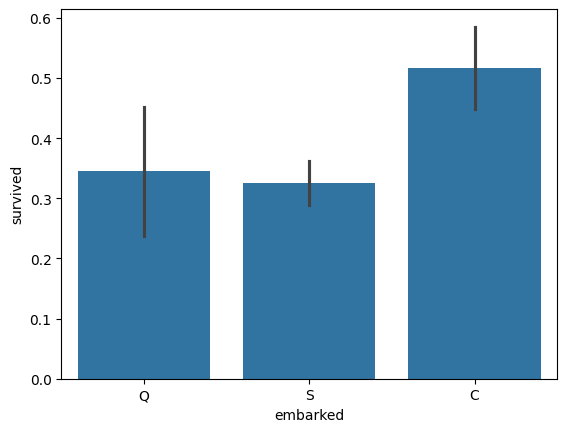

In [13]:
sb.barplot(x="embarked", y="survived", data=data)

# Preprocessing: Deal with missing values

In [14]:
data["age"] = data["age"].fillna(data["age"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [15]:
data["fare"] = data["fare"].fillna(data["fare"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [16]:
data["cabin"] = data["cabin"].fillna("U")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         850 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [17]:
data = data.dropna(subset="embarked")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    object 
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 106.1+ KB


In [18]:
print(data["cabin"].value_counts())
data["cabin"] = data["cabin"].map(lambda x: x[0])
print(data["cabin"].value_counts())

cabin
U                  659
B57 B59 B63 B66      4
C22 C26              4
D                    4
B96 B98              4
                  ... 
C104                 1
C49                  1
E52                  1
B79                  1
B37                  1
Name: count, Length: 135, dtype: int64
cabin
U    659
C     62
B     44
D     31
E     24
F     12
A     12
G      4
T      1
Name: count, dtype: int64


<ipython-input-18-06376797666f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cabin"] = data["cabin"].map(lambda x: x[0])


#Preprocessing: Deal with non-number value

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["sex"] = encoder.fit_transform(data["sex"])
data["embarked"] = encoder.fit_transform(data["embarked"])
data["cabin"] = encoder.fit_transform(data["cabin"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    int64  
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    int64  
 10  embarked      849 non-null    int64  
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 106.1+ KB


#Feature Selection

<Axes: >

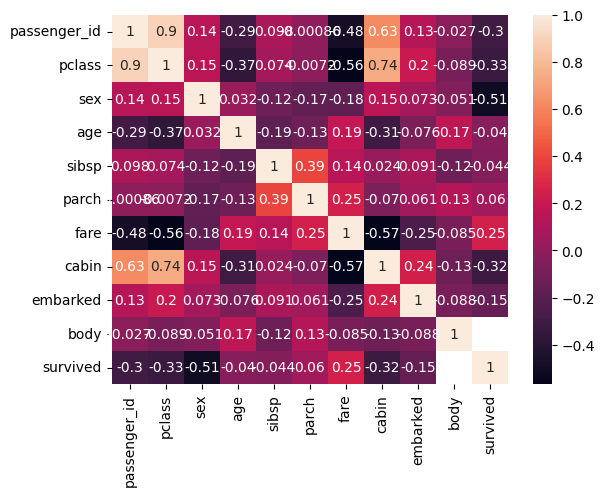

In [20]:
dataCorr = data.corr(numeric_only=True)
sb.heatmap(dataCorr, annot=True)

In [21]:
X = data[["pclass", "sex", "fare", "cabin"]]
Y = data["survived"]

In [22]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3,
                                                random_state=42)

# Data Modelling (Training)

In [55]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB

model = GaussianNB().fit(XTrain, YTrain)

In [56]:
from sklearn.metrics import classification_report

YTestPred = model.predict(XTest)
YTrainPred = model.predict(XTrain)
print("Train : " , classification_report(YTrain, YTrainPred))
print("Test : ", classification_report(YTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.77      0.88      0.82       368
           1       0.74      0.57      0.65       226

    accuracy                           0.76       594
   macro avg       0.76      0.72      0.73       594
weighted avg       0.76      0.76      0.75       594

Test :                precision    recall  f1-score   support

           0       0.80      0.85      0.83       169
           1       0.67      0.59      0.63        86

    accuracy                           0.76       255
   macro avg       0.74      0.72      0.73       255
weighted avg       0.76      0.76      0.76       255



In [44]:
from sklearn.metrics import roc_auc_score

print("Train : " , roc_auc_score(YTrain, YTrainPred))
print("Test : ", roc_auc_score(YTest, YTestPred))

Train :  0.7575990765679107
Test :  0.731216457960644


<Axes: xlabel='Predicted', ylabel='Actual'>

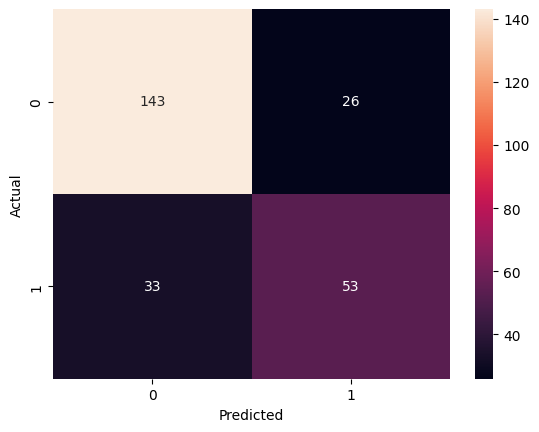

In [45]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Data Resampling

In [ ]:
#0    537 -> 312  -> 537
#1    312 -> 312  -> 537

nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataNot = dataNot.sample(nSurvived)
dataTitanicUResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicUResampled["survived"].value_counts())
print(dataTitanicUResampled.info())
print(dataTitanicUResampled.describe())

In [28]:
nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataSurvived = dataSurvived.sample(nNot, replace=True)
dataTitanicOResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicOResampled["survived"].value_counts())
print(dataTitanicOResampled.info())
print(dataTitanicOResampled.describe())

survived
0    537
1    537
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 1 to 799
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1074 non-null   int64  
 1   pclass        1074 non-null   int64  
 2   name          1074 non-null   object 
 3   sex           1074 non-null   int64  
 4   age           1074 non-null   float64
 5   sibsp         1074 non-null   int64  
 6   parch         1074 non-null   int64  
 7   ticket        1074 non-null   object 
 8   fare          1074 non-null   float64
 9   cabin         1074 non-null   int64  
 10  embarked      1074 non-null   int64  
 11  boat          523 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     624 non-null    object 
 14  survived      1074 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 134.2+ KB
None
       passenger_id       pclass          sex 

In [64]:
XU = dataTitanicUResampled[["pclass", "sex", "age", "cabin"]]
YU = dataTitanicUResampled["survived"]

XO = dataTitanicOResampled[["pclass", "sex", "age", "cabin"]]
YO = dataTitanicOResampled["survived"]

XUTrain, XUTest, YUTrain, YUTest = train_test_split(XU, YU, test_size=0.3)
XOTrain, XOTest, YOTrain, YOTest = train_test_split(XO, YO, test_size=0.3)

In [65]:
model = GaussianNB().fit(XUTrain, YUTrain)

In [66]:
YTestPred = model.predict(XUTest)
YTrainPred = model.predict(XUTrain)
print("Train : " , classification_report(YUTrain, YTrainPred))
print("Test : ", classification_report(YUTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.76      0.72      0.74       218
           1       0.73      0.78      0.75       218

    accuracy                           0.75       436
   macro avg       0.75      0.75      0.75       436
weighted avg       0.75      0.75      0.75       436

Test :                precision    recall  f1-score   support

           0       0.78      0.72      0.75        94
           1       0.74      0.80      0.77        94

    accuracy                           0.76       188
   macro avg       0.76      0.76      0.76       188
weighted avg       0.76      0.76      0.76       188



In [67]:
print("Train : " , roc_auc_score(YUTrain, YTrainPred))
print("Test : ", roc_auc_score(YUTest, YTestPred))

Train :  0.7454128440366972
Test :  0.7606382978723404


<Axes: xlabel='Predicted', ylabel='Actual'>

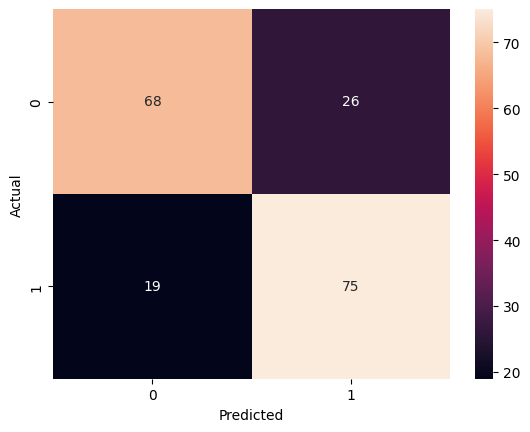

In [68]:
ConfusionMatrixDisplay = pd.crosstab(YUTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

In [69]:
YTestPred = model.predict(XOTest)
YTrainPred = model.predict(XOTrain)
print("Train : " , classification_report(YOTrain, YTrainPred))
print("Test : ", classification_report(YOTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.80      0.73      0.76       379
           1       0.75      0.81      0.78       372

    accuracy                           0.77       751
   macro avg       0.77      0.77      0.77       751
weighted avg       0.77      0.77      0.77       751

Test :                precision    recall  f1-score   support

           0       0.76      0.73      0.75       158
           1       0.75      0.78      0.77       165

    accuracy                           0.76       323
   macro avg       0.76      0.76      0.76       323
weighted avg       0.76      0.76      0.76       323



In [70]:
print("Train : " , roc_auc_score(YOTrain, YTrainPred))
print("Test : ", roc_auc_score(YOTest, YTestPred))

Train :  0.7726685959088716
Test :  0.7579976985040275


<Axes: xlabel='Predicted', ylabel='Actual'>

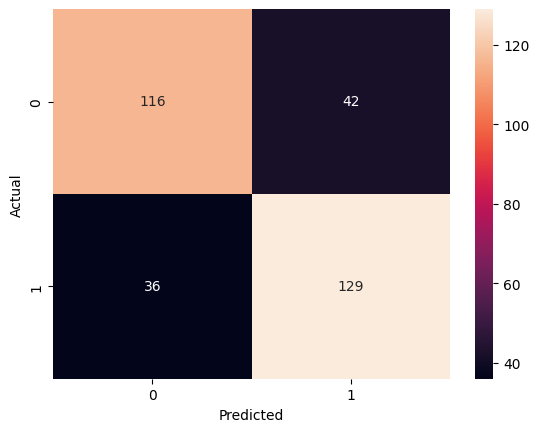

In [71]:
ConfusionMatrixDisplay = pd.crosstab(YOTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Improve the model: Hyper-parameter search

In [75]:

from sklearn.model_selection import GridSearchCV
param_grid = {"var_smoothing" : [1e-09, 1e-08, 1e-03, 1e-05, 1e-07]}

grid = GridSearchCV(GaussianNB(), param_grid, refit = True)
grid.fit(XUTrain, YUTrain)

print(grid.best_params_)
print(grid.best_estimator_)

{'var_smoothing': 1e-09}
GaussianNB()


In [76]:
model = GaussianNB(var_smoothing=1e-09).fit(XUTrain, YUTrain)

In [77]:
YTestPred = model.predict(XUTest)
YTrainPred = model.predict(XUTrain)
print("Train : " , classification_report(YUTrain, YTrainPred))
print("Test : ", classification_report(YUTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.76      0.72      0.74       218
           1       0.73      0.78      0.75       218

    accuracy                           0.75       436
   macro avg       0.75      0.75      0.75       436
weighted avg       0.75      0.75      0.75       436

Test :                precision    recall  f1-score   support

           0       0.78      0.72      0.75        94
           1       0.74      0.80      0.77        94

    accuracy                           0.76       188
   macro avg       0.76      0.76      0.76       188
weighted avg       0.76      0.76      0.76       188



In [78]:
print("Train : " , roc_auc_score(YUTrain, YTrainPred))
print("Test : ", roc_auc_score(YUTest, YTestPred))

Train :  0.7454128440366972
Test :  0.7606382978723404


<Axes: xlabel='Predicted', ylabel='Actual'>

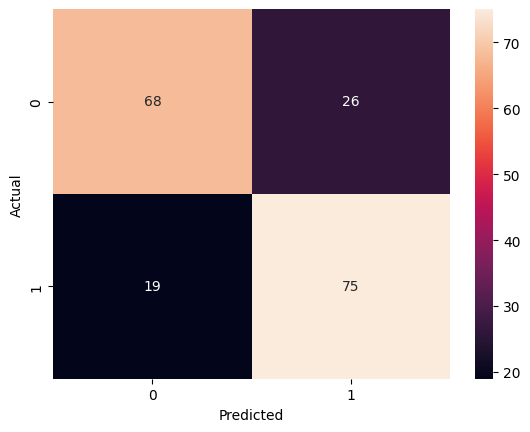

In [79]:
ConfusionMatrixDisplay = pd.crosstab(YUTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")